# 数据挖掘——chicago-building-violations数据集分析

## 一、读取数据

In [1]:
filename = 'building-violations.csv'

In [2]:
import pandas as pd
data = pd.read_csv(filename)

data.head()    #显示前5行

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,6392482,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN196019,OPEN,NaN,NO POSTED ADDRESS,OTHER : :OTHER,BUILDING ADRESSES - INCOMPLETE WITH MISSING #'S.,Post address of building in conspicuous place ...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
1,6392480,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,WEST AND SOUTH ELEVATIONS / EXTERIOR WALLS - M...,Failed to maintain the exterior walls of a bui...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
2,6392335,2019-12-04T14:00:12.000,2019-12-04T00:00:00.000,CN138106,OPEN,NaN,STOP/REMOVE NUISANCE,OTHER : :OTHER,YARD AREA; ABANDON VEHICLE.,Remove and stop nuisance. (7-28-060),...,NaN,41.711751,-87.537842,"{'latitude': '41.71175105491413', 'human_addre...",49.0,21202.0,25.0,528.0,47.0,47.0
3,6391883,2019-12-04T08:32:01.000,2019-12-04T00:00:00.000,CN197039,OPEN,NaN,RELOCATE SMOKE DETECTOR,INTERIOR:003 :,HALLWAY - SMOKE DETECTOR - 4FT BELOW CEILING.,Relocate improperly installed smoke detectors....,...,25.0,41.844521,-87.712416,"{'latitude': '41.84452110252742', 'human_addre...",32.0,21569.0,57.0,755.0,28.0,14.0
4,6392369,2019-12-04T14:14:24.000,2019-12-04T00:00:00.000,CN065034,OPEN,NaN,REPAIR WINDOW SILLS,OTHER : :OTHER,EAST WINDOW SILLS; OPEN JOINTS.,Failed to maintain window sill in good repair ...,...,NaN,41.753908,-87.562784,"{'latitude': '41.75390787131238', 'human_addre...",39.0,22538.0,24.0,246.0,37.0,43.0


In [3]:
data.info()    #样本数据的相关信息概览

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677788 entries, 0 to 1677787
Data columns (total 32 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   ID                            1677788 non-null  int64  
 1   VIOLATION LAST MODIFIED DATE  1677788 non-null  object 
 2   VIOLATION DATE                1677788 non-null  object 
 3   VIOLATION CODE                1677788 non-null  object 
 4   VIOLATION STATUS              1677788 non-null  object 
 5   VIOLATION STATUS DATE         641589 non-null   object 
 6   VIOLATION DESCRIPTION         1667020 non-null  object 
 7   VIOLATION LOCATION            780506 non-null   object 
 8   VIOLATION INSPECTOR COMMENTS  1502325 non-null  object 
 9   VIOLATION ORDINANCE           1630207 non-null  object 
 10  INSPECTOR ID                  1677788 non-null  object 
 11  INSPECTION NUMBER             1677788 non-null  int64  
 12  INSPECTION STATUS           

去除显然为独特信息，无法依靠统计填补缺失的ID、VIOLATION DESCRIPTION、VIOLATION INSPECTOR COMMENTS列数据

In [4]:
#去除显然为独特信息，无法依靠统计填补缺失的ID、VIOLATION DESCRIPTION、VIOLATION INSPECTOR COMMENTS列数据
data = data.drop(columns=['ID', 'VIOLATION DESCRIPTION', 'VIOLATION INSPECTOR COMMENTS'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677788 entries, 0 to 1677787
Data columns (total 30 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   VIOLATION LAST MODIFIED DATE  1677788 non-null  object 
 1   VIOLATION DATE                1677788 non-null  object 
 2   VIOLATION CODE                1677788 non-null  object 
 3   VIOLATION STATUS              1677788 non-null  object 
 4   VIOLATION STATUS DATE         641589 non-null   object 
 5   VIOLATION DESCRIPTION         1667020 non-null  object 
 6   VIOLATION LOCATION            780506 non-null   object 
 7   VIOLATION ORDINANCE           1630207 non-null  object 
 8   INSPECTOR ID                  1677788 non-null  object 
 9   INSPECTION NUMBER             1677788 non-null  int64  
 10  INSPECTION STATUS             1677772 non-null  object 
 11  INSPECTION WAIVED             1677788 non-null  object 
 12  INSPECTION CATEGORY         

## 二、数据可视化和摘要

### 2.1 标称属性

    对于每个标称属性：
    分别打印其每个可能所出现的频数
    并将其可视化

In [5]:
title = ['VIOLATION LAST MODIFIED DATE', 'VIOLATION DATE', 'VIOLATION CODE', 'VIOLATION STATUS', 'VIOLATION STATUS DATE', 'VIOLATION LOCATION', 'VIOLATION ORDINANCE', 'INSPECTOR ID', 'INSPECTION NUMBER', 'INSPECTION STATUS', 'INSPECTION WAIVED', 'INSPECTION CATEGORY', 'DEPARTMENT BUREAU', 'ADDRESS', 'STREET NUMBER', 'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'PROPERTY GROUP', 'SSA', 'LOCATION', 'Community Areas','Zip Codes','Boundaries - ZIP Codes','Census Tracts']

VIOLATION STATUS
OPEN        1030958
COMPLIED     641247
NO ENTRY       5583
Name: VIOLATION STATUS, dtype: int64


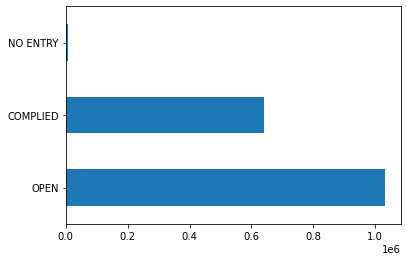

In [7]:
#由于功能重复，仅显示一个标称属性‘country’的频数统计和可视化，可通过更改i的值显示其他属性
i = 3
print(title[i])
print(getattr(data, title[i]).value_counts())
data[title[i]].value_counts().head(10).plot.barh()

### 2.2 数值属性

#### 2.2.1 五数概括

##### describe()函数

    功能：直接给出样本数据的一些基本的统计量，包括均值，标准差，最大值，最小值，分位数等。

    使用格式：data.describe()

In [8]:
data.describe()

,INSPECTION NUMBER,STREET NUMBER,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
count,1.677788e+06,1.677788e+06,1.677788e+06,321521.000000,1.676278e+06,1.676278e+06,1.675509e+06,1.676278e+06,1.675509e+06,1.676243e+06,1.675509e+06,1.675509e+06
mean,8.049798e+06,4.150382e+03,2.020547e+05,33.769197,4.184566e+01,-8.767266e+01,3.873350e+01,1.933197e+04,3.118135e+01,3.800659e+02,2.513030e+01,2.750858e+01
std,4.555757e+06,2.893493e+03,1.862796e+05,17.428210,8.742421e-02,5.760184e-02,2.008963e+01,5.606228e+03,1.943930e+01,2.290619e+02,1.498690e+01,1.530544e+01
min,2.655750e+05,1.000000e+00,1.000000e+03,1.000000,4.164467e+01,-8.791444e+01,1.000000e+00,4.299000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.304416e+06,1.648000e+03,2.056000e+04,22.000000,4.177090e+01,-8.771392e+01,2.400000e+01,2.119000e+04,1.500000e+01,1.790000e+02,1.200000e+01,1.400000e+01
50%,1.041875e+07,3.747000e+03,1.543230e+05,34.000000,4.185400e+01,-8.766985e+01,3.600000e+01,2.156900e+04,2.800000e+01,3.740000e+02,2.500000e+01,2.800000e+01
75%,1.168728e+07,6.228000e+03,3.669840e+05,49.000000,4.191350e+01,-8.763288e+01,5.800000e+01,2.224800e+04,5.200000e+01,5.720000e+02,3.700000e+01,4.100000e+01
max,1.305092e+07,1.377000e+04,6.779750e+05,69.000000,4.202269e+01,-8.752468e+01,7.700000e+01,2.262000e+04,6.100000e+01,8.010000e+02,5.000000e+01,5.300000e+01


    可得各数值属性的五数概括：
        最小值：min
        最大值：max
        四分位数（Q1）：25%
        中位数：50%
        四分位数（Q3）：75%

#### 2.2.2 缺失值个数统计(由于数据过多，仅以LONGITUDE为例)

In [9]:
print('缺失值：')
print('LONGITUDE:',data['LONGITUDE'].isnull().sum())

缺失值：
LONGITUDE: 1510


#### 2.2.3 数据可视化(由于数据过多，仅以SSA为例)

##### 直方图

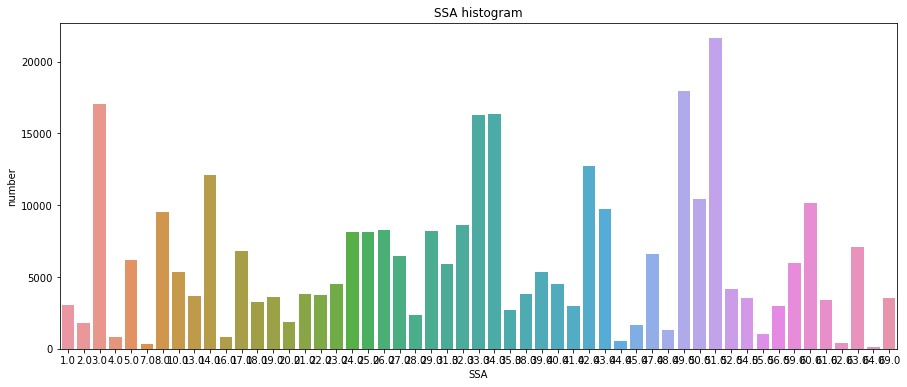

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def histogram(data, x, y ,title):
    plt.figure(figsize = (15,6))
    plt.title(title)
    sns.set_color_codes("pastel")
    sns.barplot(x=x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

#SSA
temp = data['SSA'].value_counts()
df = pd.DataFrame({'SSA':temp.index, 'number':temp.values})

histogram(df, 'SSA', 'number', 'SSA histogram')


##### 盒图

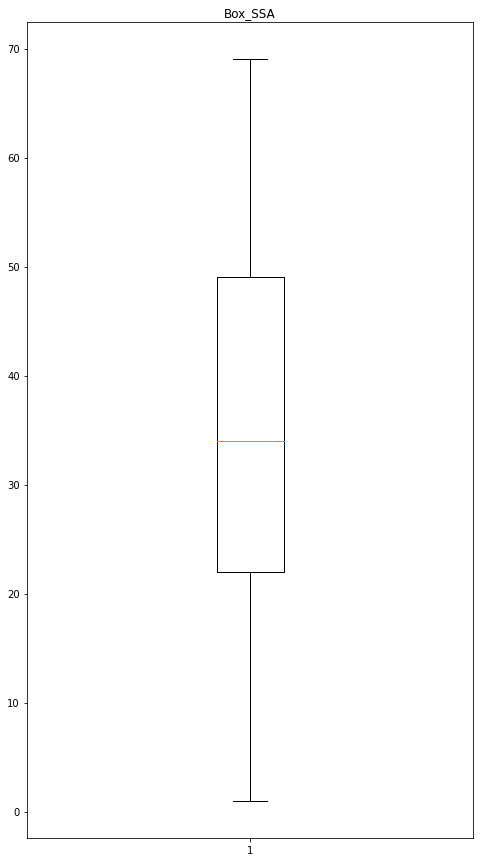

In [17]:
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data['SSA'].loc[data['SSA']<300], notch=False, sym='o', vert=True)
t = plt.title('Box_SSA')
plt.show()

## 三、数据缺失的处理

### 3.1 将缺失部分剔除

In [24]:
#将缺失部分剔除函数
def modify_delete(data):
    data_delete = data.dropna()
    return data_delete

In [25]:
#以SSA为例
data_delete = modify_delete(data['SSA'])

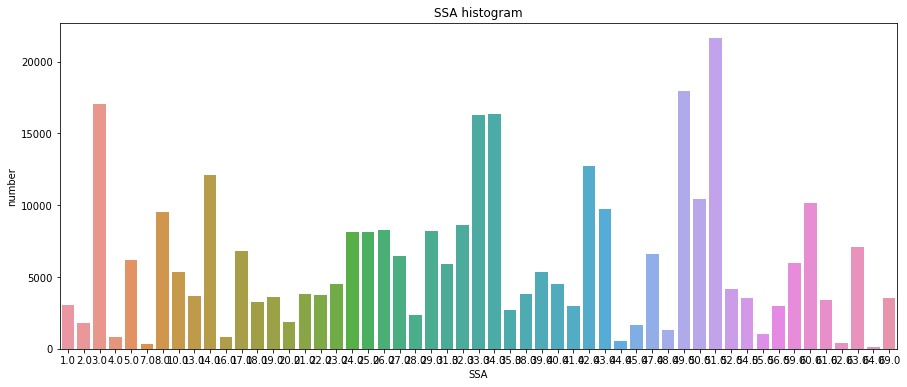

In [26]:
#直方图
temp = data_delete.value_counts()
df = pd.DataFrame({'SSA':temp.index, 'number':temp.values})

histogram(df, 'SSA', 'number', 'SSA histogram')

### 3.2 用最高频率值来填补缺失值

In [27]:
#以最高频率值填补缺失值函数
def modify_most(data):
    temp = data.mode()[0]    #求众数
    data_most = data.fillna(temp)
    return data_most

In [28]:
#以points为例
data_most = modify_most(data['SSA'])

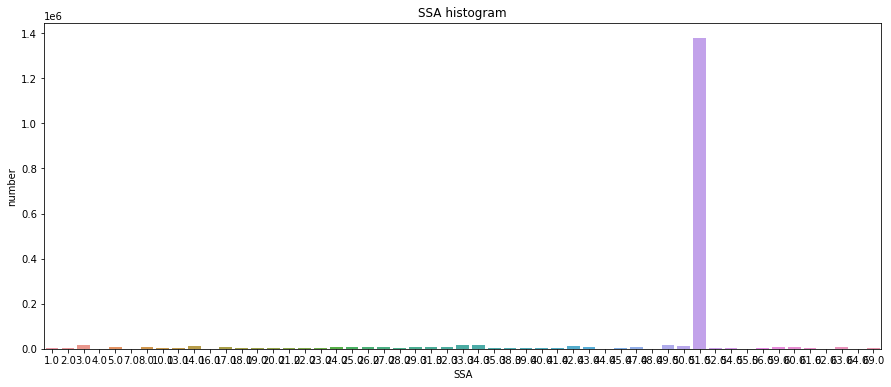

In [29]:
#直方图
temp = data_most.value_counts()
df = pd.DataFrame({'SSA':temp.index, 'number':temp.values})

histogram(df, 'SSA', 'number', 'SSA histogram')

### 3.3 通过属性的相关关系来填补缺失值

    使用纬度LATITUDE填补经度LONGITUDE

In [33]:
data_fill = pd.DataFrame(data, columns=['LATITUDE', 'LONGITUDE'])

In [34]:
data_fill.head(10)

,LATITUDE,LONGITUDE
0,41.749169,-87.602551
1,41.749169,-87.602551
2,41.711751,-87.537842
3,41.844521,-87.712416
4,41.753908,-87.562784
5,41.806815,-87.611539
6,41.753908,-87.562784
7,41.749169,-87.602551
8,41.711751,-87.537842
9,41.748732,-87.659904


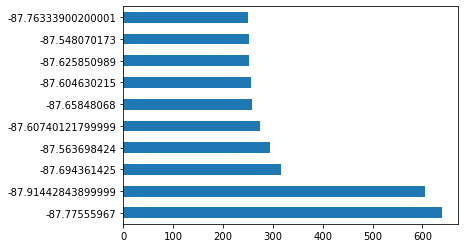

In [35]:
data_fill['LONGITUDE'].value_counts().head(10).plot.barh()

In [39]:
dict = {}
for row in data_fill.iterrows():
    dict[row[1]['LATITUDE']] = row[1]['LONGITUDE']
    
for row in data_fill.iterrows():
    try:
        region = dict[row[1]['LATITUDE']]
    except:
        continue
    row[1]['LONGITUDE'] = region

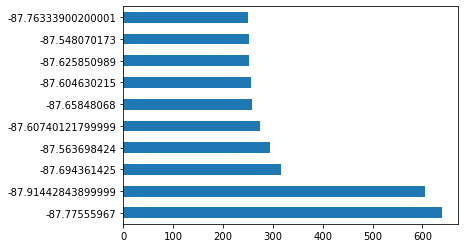

In [40]:
data_fill['LONGITUDE'].value_counts().head(10).plot.barh()

### 3.4 通过数据对象之间的相似性来填补缺失值

In [41]:
data_sim = data[['LATITUDE','LONGITUDE']]

In [42]:
point2price = {}
for row in data_sim.iterrows():
    if point2price.get(row[1]['LONGITUDE'], None):
        if not pd.isnull(row[1]['LATITUDE']):
            point2price[row[1]['LONGITUDE']][0] += row[1]['LATITUDE']
            point2price[row[1]['LONGITUDE']][1] += 1
    else:
        if not pd.isnull(row[1]['LATITUDE']):
            point2price[row[1]['LONGITUDE']] = [row[1]['LATITUDE'], 1]

In [43]:
for k in point2price.keys():
    point2price[k][0] = round(point2price[k][0] / point2price[k][1], 4)

In [45]:
for row in data_sim.iterrows():
    if pd.isnull(row[1]['LATITUDE']):
        try:
            row[1]['LATITUDE'] = point2price[row[1]['LONGITUDE']][0]
        except:
            continue

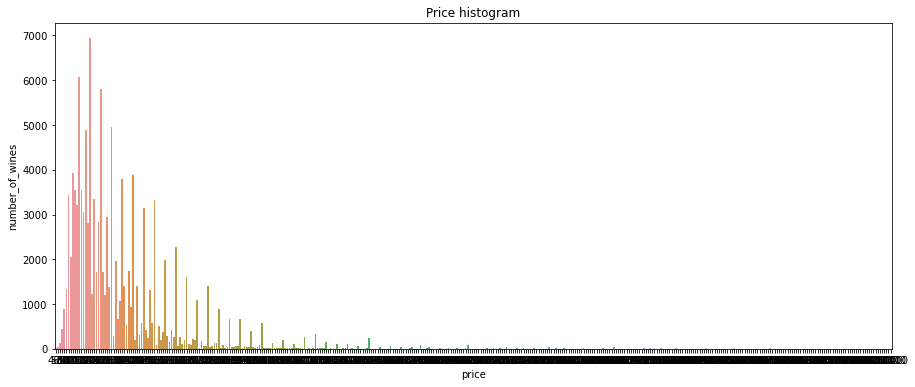

In [30]:
#对被填充后的price画直方图
temp = data_sim['LATITUDE'].value_counts()
df = pd.DataFrame({'LATITUDE':temp.index, 'number_of_wines':temp.values})

histogram(df, 'LATITUDE', 'number', 'LATITUDE histogram')